# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [1]:
# making an API call
import requests

response = requests.get('https://pokeapi.co/api/v2/pokemon/snorlax')

if response.status_code == 200:
    print('SUCCESS')
    data = response.json()
#     print(data)
else:
    print(f'ERROR, STATUS CODE {response.status_code}')

SUCCESS


In [6]:
print(data['name'])

snorlax


### Display a Pokemon's name, weight, abilities, and types

In [8]:
# get the name

name = data['name']
print(name)

snorlax


In [19]:
# get types

types = data['types']
print(types)

[{'slot': 1, 'type': {'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}}]


In [12]:
# get weight

weight = data['weight']
print(weight)

4600


In [13]:
# get abilities

abilities = data['abilities']
print(abilities)

[{'ability': {'name': 'immunity', 'url': 'https://pokeapi.co/api/v2/ability/17/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'thick-fat', 'url': 'https://pokeapi.co/api/v2/ability/47/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'gluttony', 'url': 'https://pokeapi.co/api/v2/ability/82/'}, 'is_hidden': True, 'slot': 3}]


In [15]:
ability_names = [ability['ability']['name'] for ability in data['abilities']]
print(ability_names)

['immunity', 'thick-fat', 'gluttony']


In [20]:
# Create a structure for a single pokemon
pokemon = {
    'abilites': ability_names,
    'name': data['name'],
    'types': data['types'],
    'weight': data['weight']
}
pokemon

{'abilites': ['immunity', 'thick-fat', 'gluttony'],
 'name': 'snorlax',
 'types': [{'slot': 1,
   'type': {'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}}],
 'weight': 4600}

#### Create a function to Pull in your own Pokemon's data 

In [12]:
# Create a fn that does the following:
# Asks a user to input a pokemon name:
# Requests the poke api for that pokemon's information
# Creates the data structure from above with that pokemon's information
# In addition to above keys, include height and the "front_default" sprite
# Returns the dictionary

import requests

# def poke_api_call():
#     user_poke = input('\nPlease provide the name of the Pokemon you would like to look up:\n').lower()
#     response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{user_poke}')
#     data = response.json()
#     pokemon = {
#         'abilites': [ability['ability']['name'] for ability in data['abilities']],
#         'name': data['name'],
#         'types': data['types'],
#         'weight': data['weight'],
#         'height': data['height'],
#         'front_default': data['sprites']['front_default']
#     }
#     return pokemon

# print(poke_api_call())


# class example
def poke_api_call(pokemon=None):
    if not pokemon:
        pokemon = input('\nPlease provide the name of the Pokemon you would like to look up:\n').lower()
        
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')
    
    if response.status_code == 200:
#         print('SUCCESS')
        data = response.json()
    else:
        print(f'ERROR, STATUS CODE {response.status_code}')
        return 'Error'
    
    ability_names = [ability['ability']['name'] for ability in data['abilities']]
    
    poke_dict = {
        'abilites': ability_names,
        'name': data['name'],
        'types': data['types'],
        'weight': data['weight'],
        'height': data['height'],
        'sprite': data['sprites']['front_default']
    }
    return poke_dict

print(poke_api_call())

KeyboardInterrupt: Interrupted by user

In [5]:
print(poke_api_call('pikachu'))

SUCCESS
{'abilites': ['static', 'lightning-rod'], 'name': 'pikachu', 'types': [{'slot': 1, 'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}], 'weight': 60, 'height': 4, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/25.png'}


In [13]:
def poke_api_call(pokemon=None):
    if not pokemon:
        pokemon = input('\nPlease provide the name of the Pokemon you would like to look up:\n').lower()
        
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')
    
    if response.status_code == 200:
#         print('SUCCESS')
        data = response.json()
    else:
        print(f'ERROR, STATUS CODE {response.status_code}')
        return 'Error'
    
    ability_names = [ability['ability']['name'] for ability in data['abilities']]
    
    poke_dict = {
        'name': data['name'],
        'types': data['types'],
        'abilites': ability_names,
        'weight': data['weight'],
        'height': data['height'],
        'sprite': data['sprites']['front_default']
    }
    return poke_dict

print(poke_api_call())


Please provide the name of the Pokemon you would like to look up:
snorlax
{'abilites': ['immunity', 'thick-fat', 'gluttony'], 'name': 'snorlax', 'types': [{'slot': 1, 'type': {'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}}], 'weight': 4600, 'height': 21, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/143.png'}


Choose your pokemon

In [32]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']

def team_info(team):
    info = {}
    for poke in team:
        info[poke] = poke_api_call(poke)
    return info
        
print(team_info(your_team))

# print(list(map(lambda x: {x: poke_api_call(x)}, your_team)))

{'electabuzz': {'abilites': ['static', 'vital-spirit'], 'name': 'electabuzz', 'types': [{'slot': 1, 'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}], 'weight': 300, 'height': 11, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/125.png'}, 'haunter': {'abilites': ['levitate'], 'name': 'haunter', 'types': [{'slot': 1, 'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}], 'weight': 1, 'height': 16, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/93.png'}, 'tyranitar': {'abilites': ['sand-stream', 'unnerve'], 'name': 'tyranitar', 'types': [{'slot': 1, 'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}}, {'slot': 2, 'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}], 'weight': 2020, 'height': 20, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprit

In [24]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

def team_info(team):
    info = {}
    for poke in team:
        info[poke_api_call(poke)['name']] = poke_api_call(poke)
    return info
        
print(team_info(random_team))

{'naganadel': {'abilites': ['beast-boost'], 'name': 'naganadel', 'types': [{'slot': 1, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}, {'slot': 2, 'type': {'name': 'dragon', 'url': 'https://pokeapi.co/api/v2/type/16/'}}], 'weight': 1500, 'height': 36, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/804.png'}, 'torchic': {'abilites': ['blaze', 'speed-boost'], 'name': 'torchic', 'types': [{'slot': 1, 'type': {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}}], 'weight': 25, 'height': 4, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/255.png'}, 'avalugg': {'abilites': ['own-tempo', 'ice-body', 'sturdy'], 'name': 'avalugg', 'types': [{'slot': 1, 'type': {'name': 'ice', 'url': 'https://pokeapi.co/api/v2/type/15/'}}], 'weight': 5050, 'height': 20, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/713.png'}, 'eternatus': {'abilites': ['pressure'], 'na

#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [33]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {'snorlax', 'gengar', 'tyranitar', 'feraligatr', 'slowking', 'scizor'}

print(team_info(my_six_pokemon))

{'tyranitar': {'abilites': ['sand-stream', 'unnerve'], 'name': 'tyranitar', 'types': [{'slot': 1, 'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}}, {'slot': 2, 'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}], 'weight': 2020, 'height': 20, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/248.png'}, 'feraligatr': {'abilites': ['torrent', 'sheer-force'], 'name': 'feraligatr', 'types': [{'slot': 1, 'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}], 'weight': 888, 'height': 23, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/160.png'}, 'gengar': {'abilites': ['cursed-body'], 'name': 'gengar', 'types': [{'slot': 1, 'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}], 'weight': 405, 'height': 15, 'sprite': 'https://raw.githubusercontent.com/PokeAPI/spri

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [77]:
class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.height = None
        self.sprite = None
        self.poke_api_call()
    
    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        
        if response.status_code == 200:
            data = response.json()
        else:
            return 'Error'

        ability_names = [ability['ability']['name'] for ability in data['abilities']]
        
        self.types = data['types']
        self.abilites = ability_names
        self.weight = data['weight']
        self.height = data['height']
        self.sprite = data['sprites']['front_default']
        
    def __str__(self):
        return(f'{self.name.title()}\nTypes: {self.types}\nAbilities: {self.abilities}\nWeight: {self.weight}\nHeight: {self.height}\nSprite: {self.sprite}')

In [45]:
my_snorlax = Pokemon('snorlax')

In [46]:
print(my_snorlax.weight)

4600


In [ ]:
class Pokemon():
    pass

### Let's Catch some Pokemon

In [89]:
class Pokedex:
    def __init__(self, player_name):
        self.player_name = player_name
        self.pokemon = {}
        
    def add_pokemon(self, name):
        self.pokemon[name] = Pokemon(name)
        print(f"{name.title()} was added to {self.player_name.title()}'s Pokedex.")

# Add a pokemon lookup method to lookup a pokemon and display it's information (In a user friendly way)

    def lookup(self, name):
        if name in self.pokemon:
            print(self.pokemon[name])
        else:
            print(f'{name.title()} not currently in Pokedex.')

In [90]:
dylans_pokedex = Pokedex('dylan')

In [91]:
dylans_pokedex.add_pokemon('ho-oh')

Ho-Oh was added to Dylan's Pokedex.


In [92]:
dylans_pokedex.pokemon

{'ho-oh': <__main__.Pokemon at 0x1c4751b0490>}

In [93]:
dylans_pokedex.lookup('snorlax')

Snorlax not currently in Pokedex.


## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [3]:
# Display an image in Jupyter notebook
from IPython.display import Image

# display(Image('https://i.redd.it/45n4mhusa8l41.jpg', width = 300))

import requests


In [4]:
# recreate your pokemon class here
class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.height = None
        self.sprite = None
        self.poke_api_call()
    
    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        
        if response.status_code == 200:
            data = response.json()
        else:
            return 'Error'

        ability_names = [ability['ability']['name'] for ability in data['abilities']]
        
        self.types = data['types']
        self.abilites = ability_names
        self.weight = data['weight']
        self.height = data['height']
        self.sprite = data['sprites']['front_default']
        
    def print_sprite(self):
        display(Image(self.sprite, width = 150))

    def __str__(self):
        return(f'{self.name.title()}\nTypes: {self.types}\nAbilities: {self.abilities}\nWeight: {self.weight}\nHeight: {self.height}\nSprite: {self.sprite}')

In [9]:
my_snorlax = Pokemon('snorlax')

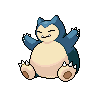

In [10]:
# Calling our new method
my_snorlax.print_sprite()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [47]:
# pokemon[species]['url']      ---requests.get--->     pokemon-species[evolution-chain]['url']      ---requests.get--->     evolution-chain

# chain = {
#     #                                            empty        charizard         charmeleon          
#     evolves_to: {0: {evolves_to: {0: {evolves_to: {}, species: {name}}}, species: {name}}},
#     #       charmander
#     species: {name}
# }

# chain = {
#     #                           empty         snorlax          
#     evolves_to: {0: {evolves_to: {}, species: {name}}},
#     #       munchlax
#     species: {name}
# }

# chain = {
#     #          empty     
#     evolves_to: {},
#     #         lugia
#     species: {name}
# }

class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.height = None
        self.sprite = None
        self.poke_api_call()
    
    def poke_api_call(self, evolved_poke=None):
        if not evolved_poke:
            response1 = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        else:
            response1 = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.evolved_poke}')

        if response1.status_code == 200:
            data1 = response1.json()
        else:
            return 'Error'

        ability_names = [ability['ability']['name'] for ability in data1['abilities']]
        
        self.types = data1['types']
        self.abilites = ability_names
        self.species_name = data1['species']['name']
        self.species = data1['species']['url']
        self.evolved_poke = evolved_poke
        self.weight = data1['weight']
        self.height = data1['height']
        self.sprite = data1['sprites']['front_default']
        # ======================================================================
        response2 = requests.get(f'{self.species}')
        
        if response2.status_code == 200:
            data2 = response2.json()
        else:
            return 'Error'

        self.species_info = data2['evolution_chain']['url']
        # ======================================================================
        response3 = requests.get(f'{self.species_info}')
        
        if response3.status_code == 200:
            data3 = response3.json()
        else:
            return 'Error'

        self.evo_chain = data3['chain']

        if self.evo_chain['species']['name'] == self.species_name:
            self.evo_chain_level = 1
            if self.evo_chain['evolves_to']:
                self.evolved_poke = self.evo_chain['evolves_to'][0]['species']['name']
        elif self.evo_chain['evolves_to'][0]['species']['name'] == self.species_name:
            self.evo_chain_level = 2
            if self.evo_chain['evolves_to'][0]['evolves_to']:
                self.evolved_poke = self.evo_chain['evolves_to'][0]['evolves_to'][0]['species']['name']
        elif self.evo_chain['evolves_to'][0]['evolves_to'][0]['species']['name'] == self.species_name:
            self.evo_chain_level = 3
        
    def evolve(self):
        if self.evo_chain_level == 1:
            if not self.evo_chain['evolves_to']:
                print(f"Your {self.species_name.title()} can't evolve any further.")
                self.print_sprite()
            else:
                print(f'Congratulations! Your {self.species_name.title()} evolved into {self.evolved_poke.title()}!')
                self.print_sprite()
                print('v '*10)
                self.poke_api_call(self.evolved_poke)
                self.print_sprite()

        elif self.evo_chain_level == 2:
            if not self.evo_chain['evolves_to'][0]['evolves_to']:
                print(f"Your {self.species_name.title()} can't evolve any further.")
                self.print_sprite()
            else:
                print(f'Congratulations! Your {self.species_name.title()} evolved into {self.evolved_poke.title()}!')
                self.print_sprite()
                print('v '*10)
                self.poke_api_call(self.evolved_poke)
                self.print_sprite()
        elif self.evo_chain_level == 3:
            print(f"Your {self.species_name.title()} can't evolve any further.")
            self.print_sprite()
    
    def print_sprite(self):
        display(Image(self.sprite, width = 150))

    def __str__(self):
        return(f'{self.name.title()}\nTypes: {self.types}\nAbilities: {self.abilities}\nWeight: {self.weight}\nHeight: {self.height}\nSprite: {self.sprite}')

In [56]:
bubby = Pokemon('snorlax')
bubby_jr = Pokemon('munchlax')
zuko = Pokemon('charmander')

Now let's evolve a few

Your Snorlax can't evolve any further.


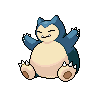

In [57]:
bubby.evolve()

Congratulations! Your Munchlax evolved into Snorlax!


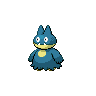

v v v v v v v v v v 


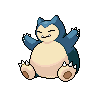

In [58]:
bubby_jr.evolve()

Congratulations! Your Charmander evolved into Charmeleon!


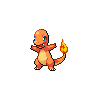

v v v v v v v v v v 


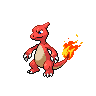

In [59]:
zuko.evolve()

Congratulations! Your Charmeleon evolved into Charizard!


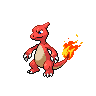

v v v v v v v v v v 


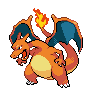

In [60]:
zuko.evolve()

Your Charizard can't evolve any further.


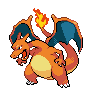

In [61]:
zuko.evolve()

#  Final Exercise (OPTIONAL): <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [ ]:
import requests

In [115]:
class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.move_list = []
        self.available_moves = None
        self.weight = None
        self.height = None
        self.sprite = None
        self.poke_api_call()
    
    def poke_api_call(self, evolved_poke=None):
        if not evolved_poke:
            response1 = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        else:
            response1 = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.evolved_poke}')

        if response1.status_code == 200:
            data1 = response1.json()
        else:
            return 'Error'

        ability_names = [ability['ability']['name'] for ability in data1['abilities']]
        available_moves = [move['move']['name'] for move in data1['moves']]
        
        self.types = data1['types']
        self.abilites = ability_names
        self.available_moves = available_moves
        self.species_name = data1['species']['name']
        self.species = data1['species']['url']
        self.evolved_poke = evolved_poke
        self.weight = data1['weight']
        self.height = data1['height']
        self.sprite = data1['sprites']['front_default']
        # ======================================================================
        response2 = requests.get(f'{self.species}')
        
        if response2.status_code == 200:
            data2 = response2.json()
        else:
            return 'Error'

        self.species_info = data2['evolution_chain']['url']
        # ======================================================================
        response3 = requests.get(f'{self.species_info}')
        
        if response3.status_code == 200:
            data3 = response3.json()
        else:
            return 'Error'

        self.evo_chain = data3['chain']

        if self.evo_chain['species']['name'] == self.species_name:
            self.evo_chain_level = 1
            if self.evo_chain['evolves_to']:
                self.evolved_poke = self.evo_chain['evolves_to'][0]['species']['name']
        elif self.evo_chain['evolves_to'][0]['species']['name'] == self.species_name:
            self.evo_chain_level = 2
            if self.evo_chain['evolves_to'][0]['evolves_to']:
                self.evolved_poke = self.evo_chain['evolves_to'][0]['evolves_to'][0]['species']['name']
        elif self.evo_chain['evolves_to'][0]['evolves_to'][0]['species']['name'] == self.species_name:
            self.evo_chain_level = 3

    def print_sprite(self):
        display(Image(self.sprite, width = 150))

    def evolve(self):
        if self.evo_chain_level == 1:
            if not self.evo_chain['evolves_to']:
                print(f"Your {self.species_name.title()} can't evolve any further.")
                self.print_sprite()
            else:
                print(f'Congratulations! Your {self.species_name.title()} evolved into {self.evolved_poke.title()}!')
                self.print_sprite()
                print('v '*10)
                self.poke_api_call(self.evolved_poke)
                self.print_sprite()

        elif self.evo_chain_level == 2:
            if not self.evo_chain['evolves_to'][0]['evolves_to']:
                print(f"Your {self.species_name.title()} can't evolve any further.")
                self.print_sprite()
            else:
                print(f'Congratulations! Your {self.species_name.title()} evolved into {self.evolved_poke.title()}!')
                self.print_sprite()
                print('v '*10)
                self.poke_api_call(self.evolved_poke)
                self.print_sprite()
        elif self.evo_chain_level == 3:
            print(f"Your {self.species_name.title()} can't evolve any further.")
            self.print_sprite()
    
    def show_moves(self):
        print(f"\nHere are your {self.species_name.title()}'s current moves:\n")
        print(self.move_list)
        
    def __str__(self):
        return(f'{self.name.title()}\nTypes: {self.types}\nAbilities: {self.abilities}\nWeight: {self.weight}\nHeight: {self.height}\nSprite: {self.sprite}')

In [122]:
# this is working, but would like to add a function to check if the move to be taught is within the available moves list for the pokemon

class Move_Tutor:
    def __init__(self):
        self.move_list = ['mega punch']

    def teach_move(self, student):
        # ask if they want to learn the move
        learn_query = input(f"\nGreetings! I can teach your Pokemon the move '{self.move_list}'. Would you like me to teach them this move?\n(Y)es | (N)o\n").lower()
        # yes
        if learn_query == 'yes' or learn_query == 'y' or learn_query == 'ye' or learn_query == '(y)es' or learn_query == '(y)e' or learn_query == '(y)' or learn_query == 'yeah' or learn_query == 'yea' or learn_query == 'ya':
            # already know the move
            if self.move_list in student.move_list:
                print(f"\nOh dear, it appears your {student.species_name.title()} already knows '{self.move_list}'. Thanks for coming!")
            # pokemon knows 4 moves already
            elif len(student.move_list) == 4:
                # ask if they want to forget a move to learn the move
                full_query = input(f"\nYour {student.species_name.title()} already knows 4 moves. Would you like them to forget a move to learn '{self.move_list.title()}'?\n(Y)es | (N)o\n").lower()
                # yes
                if full_query == 'yes' or full_query == 'y' or full_query == 'ye' or full_query == '(y)es' or full_query == '(y)e' or full_query == '(y)' or full_query == 'yeah' or full_query == 'yea' or full_query == 'ya':
                    # selecting a move to forget
                    forgetting = True
                    while forgetting:
                        forgot_move = input(f"\nWhich move would you like to forget?\n1){student.move_list[0]}\n2){student.move_list[1]}\n3){student.move_list[2]}\n4){student.move_list[3]}\n")
                        if forgot_move == '1':
                            print(f"\nYour {student.species_name.title()} has forgotten '{student.move_list[0]}'.")
                            del student.move_list[0]
                            forgetting = False
                        if forgot_move == '2':
                            print(f"\nYour {student.species_name.title()} has forgotten '{student.move_list[1]}'.")
                            del student.move_list[1]
                            forgetting = False
                        if forgot_move == '3':
                            print(f"\nYour {student.species_name.title()} has forgotten '{student.move_list[2]}'.")
                            del student.move_list[2]
                            forgetting = False
                        if forgot_move == '4':
                            print(f"\nYour {student.species_name.title()} has forgotten '{student.move_list[3]}'.")
                            del student.move_list[3]
                            forgetting = False
                        else:
                            print("\nSorry that was an invalid selection, let's try that again.")
                    # teaching the move
                    print(f"\nAlright, here we go! 1... 2... 3... *POOF*!")
                    student.move_list.append(self.move_list)
                    print(f"\nCongratulations! Your {student.species_name.title()} has successfully learned '{self.move_list}'!")
                else:
                    # abort
                    print(f"\nVery well, I did not teach your {student.species_name.title()} any moves this time. Thanks for coming!")
            else:
                # teaching the move
                print(f"\nAlright, here we go! 1... 2... 3... *POOF*!")
                student.move_list.append(self.move_list)
                print(f"\nCongratulations! Your {student.species_name.title()} has successfully learned '{self.move_list}'!")
        else:
            # abort
            print(f"\nVery well, I did not teach your {student.species_name.title()} any moves this time. Thanks for coming!")

In [117]:
bubby = Pokemon('snorlax')

In [123]:
tutor1 = Move_Tutor()

In [120]:
bubby.show_moves()


Here are your Snorlax's current moves:

[]


In [124]:
tutor1.teach_move(bubby)


Alright, here we go! 1... 2... 3... *POOF*!

Congratulations! Your Snorlax has successfully learned '['mega punch']'!


In [125]:
bubby.show_moves()


Here are your Snorlax's current moves:

[['mega punch']]


In [81]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [79]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
